In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from collections import defaultdict

In [2]:
%matplotlib inline

In [3]:
from keras.callbacks import Callback
from matplotlib import pyplot as plt
from IPython.display import clear_output
class PlotLearning(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('auc'))
        self.val_acc.append(logs.get('val_auc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True,figsize=(15,10))
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="validation_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
import telepot
def send_notify(text):
    with open('../../_access_keys/telegram_token.txt', 'r') as content_file:
        token = content_file.read()
    with open('../../_access_keys/user.txt', 'r') as content_file:
        user = content_file.read()
    try:
        TelegramBot = telepot.Bot(token)
        TelegramBot.sendMessage(int(user), text)
    except:
        pass

In [5]:
TRAIN = True
DNN = True

In [6]:
path = 'c:/data/mlbootcamp/dataset/'
path_train = path + 'train/'
path_test = path + 'test/'
path_features = 'features/'
if TRAIN:
    pathfiles = path_train
    path_subs_bs_consumption = 'subs_bs_consumption_train.csv'
    path_subs_bs_data_session = 'subs_bs_data_session_train.csv'
    path_subs_bs_voice_session = 'subs_bs_voice_session_train.csv'
    path_subs_features = 'subs_features_train.csv'
    path_subs_csi = 'subs_csi_train.csv'
    path_new_features = 'features.csv'
else:
    pathfiles = path_test
    path_subs_bs_consumption = 'subs_bs_consumption_test.csv'
    path_subs_bs_data_session = 'subs_bs_data_session_test.csv'
    path_subs_bs_voice_session = 'subs_bs_voice_session_test.csv'
    path_subs_features = 'subs_features_test.csv'
    path_subs_csi = 'subs_csi_test.csv'
    path_new_features = 'features.csv'

In [293]:
subs_csi = pd.read_csv(pathfiles + path_subs_csi, sep=';', decimal=',')

In [294]:
subs_csi.head(1)

,SK_ID,CONTACT_DATE
0,6184,02.04


In [295]:
subs_csi.shape

(5221, 2)

In [296]:
cells_2g = set(pd.read_csv(path + '2g.csv',  dtype={'cell_id': np.int32})['cell_id'].unique())
cells_3g = set(pd.read_csv(path + '3g.csv',  dtype={'cell_id': np.int32})['cell_id'].unique())
cells_4g = set(pd.read_csv(path + '4g.csv',  dtype={'cell_id': np.int32})['cell_id'].unique())

In [297]:
# 2G

In [298]:
columns_2g = ['CSSR_2G', 'PSSR_2G', 'TBF_DROP_RATE_2G', 'TCH_DROP_RATE_2G']

In [299]:
# 3G

In [300]:
columns_3g = ['CSSR_3G',    
             'PSSR_3G', 'RAB_CS_BLOCKING_RATE_3G', 'RAB_CS_DROP_RATE_3G', 'RAB_PS_BLOCKING_RATE_3G', 'RAB_PS_DROP_RATE_3G']

In [301]:
# 4G

In [302]:
columns_4g = ['ERAB_PS_BLOCKING_RATE_LTE', 'ERAB_PS_BLOCKING_RATE_PLMN_LTE',
             'ERAB_PS_DROP_RATE_LTE', 'PSSR_LTE', 'RRC_BLOCKING_RATE_LTE']

In [303]:
1

1

In [304]:
columns_avg = ['CELL_AVAILABILITY_2G', 'CELL_AVAILABILITY_3G',
       'CELL_AVAILABILITY_4G', 'CSSR_2G', 'CSSR_3G',
       'ERAB_PS_BLOCKING_RATE_LTE', 'ERAB_PS_BLOCKING_RATE_PLMN_LTE',
       'ERAB_PS_DROP_RATE_LTE', 'HSPDSCH_CODE_UTIL_3G',
       'NODEB_CNBAP_LOAD_HARDWARE', 'PART_CQI_QPSK_LTE', 'PART_MCS_QPSK_LTE',
       'PROC_LOAD_3G', 'PSSR_2G', 'PSSR_3G', 'PSSR_LTE',
       'RAB_CS_BLOCKING_RATE_3G', 'RAB_CS_DROP_RATE_3G',
       'RAB_PS_BLOCKING_RATE_3G', 'RAB_PS_DROP_RATE_3G', 'RBU_AVAIL_DL',
       'RBU_AVAIL_DL_LTE', 'RBU_AVAIL_UL', 'RBU_OTHER_DL', 'RBU_OTHER_UL',
       'RBU_OWN_DL', 'RBU_OWN_UL', 'RRC_BLOCKING_RATE_3G',
       'RRC_BLOCKING_RATE_LTE', 'RTWP_3G', 'SHO_FACTOR', 'TBF_DROP_RATE_2G',
       'TCH_DROP_RATE_2G', 'UTIL_BRD_CPU_3G', 'UTIL_CE_DL_3G',
       'UTIL_CE_HW_DL_3G', 'UTIL_CE_UL_3G', 'UTIL_SUBUNITS_3G',
       'UL_VOLUME_LTE', 'DL_VOLUME_LTE', 'TOTAL_DL_VOLUME_3G',
       'TOTAL_UL_VOLUME_3G']

In [305]:
columns_chhn = ['AVEUSERNUMBER', 'AVEUSERNUMBER_PLMN',
       'AVR_DL_HSPA_USER_3G', 'AVR_DL_R99_USER_3G', 'AVR_DL_USER_3G',
       'AVR_DL_USER_LTE', 'AVR_TX_POWER_3G', 'AVR_UL_HSPA_USER',
       'AVR_UL_R99_USER', 'AVR_UL_USER_3G', 'AVR_UL_USER_LTE',
       'DL_AVR_THROUGHPUT_3G', 'DL_AVR_THROUGHPUT_LTE',
       'DL_AVR_THROUGHPUT_R99', 'DL_MEAN_USER_THROUGHPUT_LTE',
       'DL_MEAN_USER_THROUGHPUT_DL_2G', 'DL_MEAN_USER_THROUGHPUT_HSPA3G',
       'DL_MEAN_USER_THROUGHPUT_PLTE', 'DL_MEAN_USER_THROUGHPUT_REL93G',
       'HSDPA_USERS_3G', 'HSUPA_USERS_3G', 'RBU_USED_DL', 'RBU_USED_UL',
       'RELATIVE_RBU_USED_DL', 'RELATIVE_RBU_USED_UL', 'RELATIVE_TX_POWER_3G',
       'UL_AVR_THROUGHPUT_3G', 'UL_AVR_THROUGHPUT_LTE',
       'UL_AVR_THROUGHPUT_R99', 'UL_MEAN_USER_THROUGHPUT_LTE',
       'UL_MEAN_USER_THROUGHPUT_HS3G', 'UL_MEAN_USER_THROUGHPUT_PLTE',
       'UL_MEAN_USER_THROUGHPUT_REL93G']

In [306]:
data_columns = ['CELL_AVAILABILITY_2G', 'CELL_AVAILABILITY_3G', 'CELL_AVAILABILITY_4G', 'ERAB_PS_BLOCKING_RATE_LTE',
                'ERAB_PS_BLOCKING_RATE_PLMN_LTE', 'ERAB_PS_DROP_RATE_LTE', 'HSPDSCH_CODE_UTIL_3G', 'NODEB_CNBAP_LOAD_HARDWARE',
                'PART_CQI_QPSK_LTE', 'PART_MCS_QPSK_LTE', 'PROC_LOAD_3G', 'PSSR_2G', 'PSSR_3G', 'PSSR_LTE', 
                'RAB_PS_BLOCKING_RATE_3G', 'RAB_PS_DROP_RATE_3G', 'RBU_AVAIL_DL_LTE', 'RBU_AVAIL_DL', 'RBU_AVAIL_UL', 'RBU_OTHER_DL',
                'RBU_OTHER_UL', 'RBU_OWN_DL', 'RBU_OWN_UL', 'RRC_BLOCKING_RATE_3G', 'RRC_BLOCKING_RATE_LTE', 'RTWP_3G',
                'SHO_FACTOR', 'TBF_DROP_RATE_2G', 'UTIL_BRD_CPU_3G', 'UTIL_CE_DL_3G', 'UTIL_CE_HW_DL_3G', 'UTIL_CE_UL_3G',
                'UTIL_SUBUNITS_3G', 'UL_VOLUME_LTE', 'DL_VOLUME_LTE', 'TOTAL_DL_VOLUME_3G', 'TOTAL_UL_VOLUME_3G', 'AVEUSERNUMBER',
                'AVEUSERNUMBER_PLMN', 'AVR_DL_HSPA_USER_3G', 'AVR_DL_R99_USER_3G', 'AVR_DL_USER_3G', 'AVR_DL_USER_LTE',
                'AVR_TX_POWER_3G', 'AVR_UL_HSPA_USER', 'AVR_UL_R99_USER', 'AVR_UL_USER_3G', 'AVR_UL_USER_LTE',
                'DL_AVR_THROUGHPUT_3G', 'DL_AVR_THROUGHPUT_LTE', 'DL_AVR_THROUGHPUT_R99', 'DL_MEAN_USER_THROUGHPUT_LTE',
                'DL_MEAN_USER_THROUGHPUT_DL_2G', 'DL_MEAN_USER_THROUGHPUT_HSPA3G', 'DL_MEAN_USER_THROUGHPUT_PLTE',
                'DL_MEAN_USER_THROUGHPUT_REL93G', 'HSDPA_USERS_3G', 'HSUPA_USERS_3G', 'RBU_USED_DL', 'RBU_USED_UL',
                'RELATIVE_RBU_USED_DL', 'RELATIVE_RBU_USED_UL', 'RELATIVE_TX_POWER_3G', 'UL_AVR_THROUGHPUT_3G',
                'UL_AVR_THROUGHPUT_LTE', 'UL_AVR_THROUGHPUT_R99', 'UL_MEAN_USER_THROUGHPUT_LTE', 'UL_MEAN_USER_THROUGHPUT_HS3G',
                'UL_MEAN_USER_THROUGHPUT_PLTE', 'UL_MEAN_USER_THROUGHPUT_REL93G'
               ]

In [307]:
voice_columns = ['CELL_AVAILABILITY_2G', 'CELL_AVAILABILITY_3G', 'CELL_AVAILABILITY_4G', 'CSSR_2G', 'CSSR_3G',
                 'NODEB_CNBAP_LOAD_HARDWARE', 'PROC_LOAD_3G', 'RAB_CS_BLOCKING_RATE_3G', 'RAB_CS_DROP_RATE_3G',
                 'RBU_AVAIL_DL_LTE', 'RBU_AVAIL_DL', 'RBU_AVAIL_UL', 'RBU_OTHER_DL', 'RBU_OTHER_UL', 'RBU_OWN_DL', 'RBU_OWN_UL',
                 'RRC_BLOCKING_RATE_3G', 'RTWP_3G', 'SHO_FACTOR', 'TCH_DROP_RATE_2G', 'UTIL_BRD_CPU_3G', 'UTIL_CE_DL_3G',
                 'UTIL_CE_HW_DL_3G', 'UTIL_CE_UL_3G', 'UTIL_SUBUNITS_3G', 'AVR_TX_POWER_3G',
                 'RELATIVE_RBU_USED_DL', 'RELATIVE_RBU_USED_UL', 'RELATIVE_TX_POWER_3G'
                ]

In [308]:
#,  dtype={'cell_id': np.int32}

In [309]:
columns_chhn = ['AVEUSERNUMBER', 'AVR_TX_POWER_3G',
       'DL_AVR_THROUGHPUT_3G', 'DL_AVR_THROUGHPUT_LTE',
       'DL_AVR_THROUGHPUT_R99', 'DL_MEAN_USER_THROUGHPUT_LTE',
       'DL_MEAN_USER_THROUGHPUT_HSPA3G',
       'DL_MEAN_USER_THROUGHPUT_PLTE', 'DL_MEAN_USER_THROUGHPUT_REL93G',

       'UL_AVR_THROUGHPUT_3G', 'UL_AVR_THROUGHPUT_LTE',
       'UL_AVR_THROUGHPUT_R99', 'UL_MEAN_USER_THROUGHPUT_LTE',
       'UL_MEAN_USER_THROUGHPUT_HS3G', 'UL_MEAN_USER_THROUGHPUT_PLTE',
       'UL_MEAN_USER_THROUGHPUT_REL93G']

In [310]:
%%time
if TRAIN:
    parameters_nets = defaultdict()
    for tc in [columns_2g, columns_3g, columns_4g, columns_chhn]:
        for c in tc:
            for i in range(3):
                index = i + 1
                gdata = pd.read_csv(path + '{0}_{1}.csv'.format(c, index),  dtype={'CELL_LAC_ID': np.int32})
                for v in gdata.values:
                    key = (int(v[1]), v[0])
                    parameters_nets.setdefault(key, set()).add((c, i))
                print(c, i)

Wall time: 1.01 ms


In [311]:
def get_params(result, cell_id, dt, the_data, v):
    index = 0
    key = (cell_id, dt)
    item = None
    if key in parameters_nets:
        item = parameters_nets[key]
    for tc in [columns_2g, columns_3g, columns_4g, columns_chhn]:
        for c in tc:
            for i in range(3):
                if (c in data_columns and the_data) or (c in voice_columns and not the_data):
                    if item is not None:
                        if (c, i) in item:
                            result[2 * index + 0] += v
                            result[2 * index + 1] += 1
                    index = index + 1
    #print(index)
    return result

In [312]:
len(get_params([], 0, 0, True, 1))

0

In [313]:
subs_bs_consumption = pd.read_csv(pathfiles + path_subs_bs_consumption, sep=';', decimal=',')

In [314]:
subs_bs_consumption.head(1)

,SK_ID,CELL_LAC_ID,MON,SUM_MINUTES,SUM_DATA_MB,SUM_DATA_MIN
0,6357,104453,01.02,0.0,0.0,0.000234


In [315]:
subs_bs_consumption['month'] = subs_bs_consumption['MON'].apply(lambda x:datetime.strptime(x, '%d.%m').month)

In [316]:
month_dif = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
def get_month_dif(month):
    return month_dif[month - 1]

In [317]:
def append_data(key, index, i, m):
    subs_bs_consumption_minutes[key][index] += i[3] / get_month_dif(m)
    subs_bs_consumption_data[key][index] += i[4] / get_month_dif(m)
    subs_bs_consumption_voice[key][index] += i[5] / get_month_dif(m)
    subs_bs_consumption_data[key][index + 1] += 1
    subs_bs_consumption_minutes[key][index + 1] += 1
    subs_bs_consumption_voice[key][index + 1] += 1
        
subs_bs_consumption_data = defaultdict()
subs_bs_consumption_minutes = defaultdict()
subs_bs_consumption_voice = defaultdict()
for i in subs_bs_consumption.values:
    sk_id = i[0]
    m = i[6]
    cell_id = i[1]
    key = (sk_id, m)
    subs_bs_consumption_data.setdefault(key, [0, 0, 0, 0, 0, 0, 0, 0])
    subs_bs_consumption_minutes.setdefault(key, [0, 0, 0, 0, 0, 0, 0, 0])
    subs_bs_consumption_voice.setdefault(key, [0, 0, 0, 0, 0, 0, 0, 0])
    if cell_id in cells_2g:
        append_data(key, 0, i, m)
    if cell_id in cells_3g:
        append_data(key, 2, i, m)
    if cell_id in cells_4g:
        append_data(key, 4, i, m)
    append_data(key, 6, i, m)

In [318]:
def standart(_mx, _dict):
    for key in _dict:
        item = _dict[key]
        for i in range(8):
            _mx[i] = np.max([_mx[i], item[i]])

if TRAIN:
    data_mx = [0, 0, 0, 0, 0, 0, 0, 0]
    standart(data_mx, subs_bs_consumption_data)
    min_mx = [0, 0, 0, 0, 0, 0, 0, 0]
    standart(min_mx, subs_bs_consumption_minutes)
    voice_mx = [0, 0, 0, 0, 0, 0, 0, 0]
    standart(voice_mx, subs_bs_consumption_voice)

In [319]:
min_mx

[0.02975513470645162,
 349,
 0.03306259774999999,
 756,
 0.007738455046666669,
 1108,
 0.03480370956999999,
 1448]

In [320]:
subs_bs_data_session = pd.read_csv(pathfiles + path_subs_bs_data_session, sep=';', decimal=',')

In [321]:
subs_bs_data_session.head(1)

,SK_ID,CELL_LAC_ID,DATA_VOL_MB,START_TIME
0,4992,3442,0.000564,13.03 16:00:00


In [322]:
subs_bs_data_session['day'] = subs_bs_data_session['START_TIME'].apply(lambda x:datetime.strptime(x, '%d.%m %H:%M:%S').date())

In [323]:
user_data_session = defaultdict()
for i in subs_bs_data_session.values:
    sk_id = i[0]
    dt = i[4]
    cell_id = i[1]
    key = (sk_id, dt)
    user_data_session.setdefault(key, defaultdict()).setdefault(cell_id, 0)
    user_data_session[key][cell_id] += i[2]

In [324]:
mx_data = [0.04403474597558999,
 17.0,
 0.10681948990649001,
 22.0,
 0.008108765826749999,
 5.0,
 0.039482985031810004,
 20.0,
 0.34390804355693994,
 45.0,
 0.17186245079211998,
 23.0,
 2.19409534707708,
 71.0,
 0.49649307057301,
 53.0,
 3.9075563596610294,
 44.0,
 0.22228982460173,
 16.0,
 0.1594160576595,
 14.0,
 0.13241774348152002,
 9.0,
 0.38035099499083996,
 49.0,
 3.9075563596610294,
 76.0,
 0.7967573363090201,
 26.0,
 1.2757119525067502,
 43.0,
 1.0333757285307996,
 46.0,
 0.9592630652308298,
 39.0,
 0.57891133275178,
 32.0,
 0.68382974327276,
 29.0,
 0.6425194990805501,
 40.0,
 0.31184953828453,
 23.0,
 0.62670324045005,
 44.0,
 0.7785659334577402,
 33.0,
 1.2757119525067502,
 94.0,
 1.2757119525067502,
 88.0,
 0.0,
 0.0,
 1.2757119525067502,
 35.0,
 1.19643275222867,
 48.0,
 1.1049123081166201,
 37.0,
 0.6198910745084301,
 55.0,
 0.62670324045005,
 47.0,
 0.7785659334577402,
 40.0,
 3.9075563596610294,
 26.0,
 2.1853913163519203,
 63.0,
 2.19409534707708,
 32.0,
 3.9075563596610294,
 32.0,
 3.29117251651561,
 54.0,
 1.2768937666490598,
 33.0,
 0.34208093408306,
 40.0,
 1.2757119525067502,
 51.0,
 0.6345058147698199,
 42.0,
 3.9075563596610294,
 51.0,
 3.29117251651561,
 46.0,
 2.19409534707708,
 27.0,
 0.78082586307448,
 39.0,
 1.19643275222867,
 38.0,
 1.2757119525067502,
 39.0,
 0.49649307057301,
 57.0,
 0.49649307057301,
 58.0,
 0.0,
 0.0,
 0.78082586307448,
 39.0,
 1.19643275222867,
 38.0,
 1.2757119525067502,
 38.0,
 2.1853913163519203,
 71.0,
 3.29117251651561,
 46.0,
 0.25014478856063005,
 33.0,
 3.9075563596610294,
 31.0,
 2.19409534707708,
 45.0,
 1.19912137107722,
 29.0,
 0.9323249269039897,
 43.0,
 1.1049123081166201,
 47.0,
 1.2757119525067502,
 25.0,
 2.1853913163519203,
 52.0,
 1.2768937666490598,
 36.0,
 3.9075563596610294,
 35.0,
 1.2757119525067502,
 49.0,
 0.80025203180357,
 48.0,
 0.9592630652308298,
 35.0,
 1.2768937666490598,
 58.0,
 3.29117251651561,
 55.0,
 3.9075563596610294,
 30.0,
 1.2757119525067502,
 49.0,
 0.80025203180357,
 47.0,
 0.9592630652308298,
 35.0,
 0.37986953805341006,
 40.0,
 3.9075563596610294,
 46.0,
 2.1853913163519203,
 69.0,
 0.34390804355693994,
 3.9075563596610294,
 2.1853913163519203,
 50.0,
 87.0,
 110.0,
 1.0,
 14.0]


In [325]:
mx_voice = [1.6647916500000002,
 18.0,
 1.3381249666666668,
 24.0,
 1.8892360625,
 35.0,
 1.8582638416666666,
 57.0,
 1.2007638666666665,
 27.0,
 1.2356249833333333,
 23.0,
 1.3186805333333333,
 38.0,
 1.9199305166666663,
 35.0,
 1.6053472125,
 40.0,
 0.6181249916666667,
 12.0,
 0.5771527708333333,
 11.0,
 0.6883333208333332,
 11.0,
 1.3553472125,
 60.0,
 1.42916665,
 17.0,
 1.4139583083333334,
 21.0,
 1.1377082958333333,
 25.0,
 1.5171527583333333,
 41.0,
 1.2847916374999997,
 28.0,
 2.0988193833333333,
 1.9199305166666663,
 0.8027777708333333,
 73.0,
 66.0,
 21.0,
 1.0,
 14.0]

In [326]:
mx = np.zeros(20000)

In [327]:
def get_internet_type_id(sk_id, month):
    try:
        return subs_features[(subs_features['SK_ID'] == sk_id) & (subs_features['month'] == (month + 1))]['INTERNET_TYPE_ID'].iloc(0)[0]
    except:
        try:
            return subs_features[(subs_features['SK_ID'] == sk_id) & (subs_features['month'] == (month))]['INTERNET_TYPE_ID'].iloc(0)[0]
        except:
            return subs_features[(subs_features['SK_ID'] == sk_id)]['INTERNET_TYPE_ID'].iloc(0)[0]

In [328]:
def get_cells_data(cell_dict, mxs, list_sk_id, dates, is_data, count_days=7):
    table = []
    for i in zip(list_sk_id, dates):
        sk_id = i[0]
        sd = i[1]
        row = []
        table_columns = []
        pre_month = None
        for j in range(count_days):
            cd = sd - timedelta(j)
            if pre_month is None or pre_month != cd.month:
                internet_type_id = get_internet_type_id(sk_id, cd.month)
                pre_month = cd.month
            cells_g = [0, 0, 0, 0, 0, 0, internet_type_id, j]
            if is_data:
                len_params = 78 * 2
            else:
                len_params = 18 * 2
            result = np.zeros(len_params)

            if (sk_id, cd) in cell_dict:
                item = cell_dict[(sk_id, cd)]
                for key in item:
                    cell = (key, item[key])
                    if cell[0] in cells_2g:
                        cells_g[0] += cell[1]
                        cells_g[3] += 1
                    if cell[0] in cells_3g:
                        cells_g[1] += cell[1]
                        cells_g[4] += 1
                    if cell[0] in cells_4g:
                        cells_g[2] += cell[1]
                        cells_g[5] += 1
                    result = get_params(result, cell[0], cd.day + cd.month / 100, is_data, cell[1])
                
            news = list(result)
            news.extend(list(cells_g))
            
            for p in range(len(news)):
                #mx[p] = np.max([news[p], mx[p]])
                if mxs[p] != 0:
                    news[p] /= mxs[p]

            row.append(np.array(news))
        table.append(np.array(row))
    return table

In [329]:
list(mx)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [330]:
subs_bs_voice_session = pd.read_csv(pathfiles + path_subs_bs_voice_session, sep=';', decimal=',')

In [331]:
subs_bs_voice_session['day'] = subs_bs_voice_session['START_TIME'].apply(lambda x:datetime.strptime(x, '%d.%m %H:%M:%S').date())

In [332]:
subs_bs_voice_session.head(1)

,SK_ID,CELL_LAC_ID,VOICE_DUR_MIN,START_TIME,day
0,9551,211015,0.001875,18.03 19:00:00,1900-03-18


In [333]:
user_voice_session = defaultdict()
for i in subs_bs_voice_session.values:
    sk_id = i[0]
    dt = i[4]
    cell_id = i[1]
    key = (sk_id, dt)
    user_voice_session.setdefault(key, defaultdict()).setdefault(cell_id, 0)
    user_voice_session[key][cell_id] += i[2]

In [334]:
subs_features = pd.read_csv(pathfiles + path_subs_features, sep=';', decimal=',')

In [335]:
subs_features.head(1)

,SNAP_DATE,COM_CAT#1,SK_ID,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,...,COM_CAT#25,COM_CAT#26,COM_CAT#27,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34
0,01.10.01,8,6954,44,12,1,1,12.0,3,NaN,...,1,1,0.014411,0.036439,0.0,0.0,0.040759,0.027579,0.103896,10.0


In [336]:
subs_features.describe()

,COM_CAT#1,SK_ID,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,DEVICE_TYPE_ID,...,COM_CAT#25,COM_CAT#26,COM_CAT#27,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34
count,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58968.000000,58989.000000,54254.000000,58798.000000,...,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,57128.000000
mean,4.475614,6909.303023,40.964231,5.274170,1.939362,0.990541,7.506088,2.418400,875.009032,4.602384,...,0.999898,0.989049,0.016375,0.017566,0.004167,0.004383,0.045646,0.028234,0.105025,5.618996
std,2.187412,1868.652121,22.121673,2.804044,0.238668,0.096799,3.271280,1.655322,513.958120,0.910405,...,0.010085,0.104074,0.024331,0.030751,0.013551,0.020910,0.052554,0.008920,0.011167,3.560419
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019839,0.093571,1.000000
25%,3.000000,5692.000000,25.000000,5.000000,2.000000,1.000000,5.000000,1.000000,394.000000,5.000000,...,1.000000,1.000000,0.001940,0.000873,0.000000,0.000000,0.010227,0.027579,0.103896,2.000000
50%,4.000000,7031.000000,38.000000,5.000000,2.000000,1.000000,7.000000,2.000000,926.000000,5.000000,...,1.000000,1.000000,0.007878,0.006288,0.000039,0.000000,0.029631,0.027579,0.103896,5.000000
75%,6.000000,8399.000000,60.000000,5.000000,2.000000,1.000000,10.000000,3.000000,1315.000000,5.000000,...,1.000000,1.000000,0.020910,0.021304,0.002761,0.000083,0.062445,0.027579,0.103896,9.000000
max,8.000000,9748.000000,83.000000,17.000000,2.000000,1.000000,12.000000,9.000000,1702.000000,8.000000,...,1.000000,1.000000,0.727991,1.000000,0.431942,0.954655,0.678783,1.000000,1.000000,10.000000


In [337]:
subs_features['SNAP_DATE'] = subs_features['SNAP_DATE'].apply(lambda x:datetime.strptime(x, '%d.%m.%y'))

In [338]:
subs_features['COM_CAT#24'].value_counts()

31.12    58983
08.04        1
15.04        1
12.04        1
22.04        1
23.04        1
19.04        1
Name: COM_CAT#24, dtype: int64

In [339]:
subs_features['COM_CAT#24'] = subs_features['COM_CAT#24'].apply(lambda x:int(x == '31.12'))

In [340]:
subs_features['COM_CAT#34'].fillna(subs_features['COM_CAT#34'].median(), inplace=True)
subs_features['COM_CAT#8'].fillna(subs_features['COM_CAT#8'].median(), inplace=True)
subs_features['DEVICE_TYPE_ID'].fillna(subs_features['DEVICE_TYPE_ID'].median(), inplace=True)
subs_features['ARPU_GROUP'].fillna(subs_features['ARPU_GROUP'].median(), inplace=True)
subs_features['INTERNET_TYPE_ID'].fillna(subs_features['INTERNET_TYPE_ID'].median(), inplace=True)

In [341]:
subs_features['month'] = subs_features['SNAP_DATE'].apply(lambda x:x.month)
subs_features['year'] = subs_features['SNAP_DATE'].apply(lambda x:x.year)

In [342]:
subs_features['ago'] = 0

In [343]:
columns = ['COM_CAT#1', 'COM_CAT#2', 'COM_CAT#3', 'BASE_TYPE', 'ACT', 'ARPU_GROUP', 'COM_CAT#7', 'COM_CAT#8',
          'DEVICE_TYPE_ID', 'INTERNET_TYPE_ID', 'REVENUE', 'ITC', 'VAS', 'RENT_CHANNEL', 'ROAM',
          'COST']
for i in range(18):
    columns.append('COM_CAT#{}'.format(i+17))
columns.append('ago')
if TRAIN:
    factors = {}
for c in columns:
    #emean =  np.mean(subs_features[c])
    if TRAIN:
        emin = np.min(subs_features[c])
    else:
        emin = factors[c][0]
    #subs_features[c] -= emean
    subs_features[c] -= emin
    if TRAIN:
        emax = np.max(subs_features[c])
    else:
        emax = factors[c][1]
    subs_features[c] /= emax
    if TRAIN:
        factors[c] = (emin, emax)

In [344]:
def get_subs_features(year, month, fix_month, day, sk_id):
    data = subs_features[(subs_features['year'] == year) & (subs_features['month'] == month) & (subs_features['SK_ID'] == sk_id)]
    columns = ['COM_CAT#1', 'COM_CAT#2', 'COM_CAT#3', 'BASE_TYPE', 'ACT', 'ARPU_GROUP', 'COM_CAT#7', 'COM_CAT#8',
              'DEVICE_TYPE_ID', 'INTERNET_TYPE_ID', 'REVENUE', 'ITC', 'VAS', 'RENT_CHANNEL', 'ROAM',
              'COST']
    for i in range(18):
        columns.append('COM_CAT#{}'.format(i+17))
    columns.append('ago')
    if data.shape[0] == 1:
        return columns, data[columns].values[0].tolist()
    else:
        return columns, list(np.zeros(len(columns)))

In [345]:
if False:
    # for dnn
    table = []
    if TRAIN:
        y = np.zeros(subs_csi.shape[0])
    for i in enumerate(subs_csi.values):
        sk_id = int(i[1][0])
        line = []
        if TRAIN:
            dt = str(i[1][2]).split('.')
        else:
            dt = str(i[1][1]).split('.')
        year = 2002
        month = int(dt[1])
        for j in range(12):
            new_line = get_subs_features(year, month, int(dt[1]), int(dt[0]), sk_id)
            line.extend(new_line[1])
            month -= 1
            if month == 0:
                month = 12
                year -= 1
        table.append(line)
        if TRAIN:
            y[i[0]] = i[1][1]

In [346]:
def extend_qos(sk_id, month):
    result = []
    key = (sk_id, month)
    if (key in subs_bs_consumption_data):
        item = subs_bs_consumption_data[key]
        for i in range(8):
            if data_mx[i] != 0:
                result.append(item[i] / data_mx[i])
            else:
                result.append(item[i])
            #print(i, item[i] / data_mx[i], item[i], data_mx[i])
    else:
        result.extend([0,0,0,0,0,0,0,0])
    if (key in subs_bs_consumption_minutes):
        item = subs_bs_consumption_minutes[key]
        for i in range(8):
            if min_mx[i] != 0:
                result.append(item[i] / min_mx[i])
            else:
                result.append(item[i])
            #print(i, item[i] / min_mx[i], item[i], min_mx[i])
    else:
        result.extend([0,0,0,0,0,0,0,0])
    if (key in subs_bs_consumption_voice):
        item = subs_bs_consumption_voice[key]
        for i in range(8):
            if voice_mx[i] != 0:
                result.append(item[i] / voice_mx[i])
            else:
                result.append(item[i])
            #print(i, item[i] / voice_mx[i], item[i], voice_mx[i])
    else:
        result.extend([0,0,0,0,0,0,0,0])

    #print(result)
    return result

In [366]:
# for cnn
table = []
if TRAIN:
    y = np.zeros(subs_csi.shape[0])
for i in enumerate(subs_csi.values):
    sk_id = int(i[1][0])
    #line = [sk_id]
    #table_columns = ['sk_id']
    if TRAIN:
        dt = str(i[1][2]).split('.')
    else:
        dt = str(i[1][1]).split('.')
    year = 2002
    month = int(dt[1])
    row = []
    ccc = 6
    for j in range(ccc):
        new_line = get_subs_features(year, month, int(dt[1]), int(dt[0]), sk_id)
        new_line[1][-1] = j / ccc
        qos = list(extend_qos(sk_id, month))
        qos.extend(list(new_line[1]))
        row.append(np.array(qos))
        
        #table_columns.extend(new_line[0])
        month -= 1
        if month == 0:
            month = 12
            year -= 1
    table.append(np.array(row))

    if TRAIN:
        y[i[0]] = i[1][1]

In [367]:
data = np.array(table)

In [368]:
data.shape

(5221, 6, 59)

In [369]:
data.max()

2.6476319579767855

In [370]:
X = np.asarray(data)

In [371]:
np.savetxt('X_5221_6_59.test', X.reshape(5221 * 6 * 59), delimiter=',')

In [212]:
count_days = 14

In [213]:
table2 = get_cells_data(user_data_session, mx_data, list(subs_csi['SK_ID']), list(subs_csi['CONTACT_DATE'].apply(lambda x:datetime.strptime(x, '%d.%m').date())), True, count_days)

In [214]:
data2 = np.array(table2)

In [215]:
data2.shape

(5221, 14, 164)

In [216]:
data2.max()

4.794888226046227

In [217]:
table3 = get_cells_data(user_voice_session, mx_voice, list(subs_csi['SK_ID']), list(subs_csi['CONTACT_DATE'].apply(lambda x:datetime.strptime(x, '%d.%m').date())), False, count_days)

In [218]:
data3 = np.array(table3)

In [219]:
data3.max()

3.373702425378048

In [220]:
from sklearn import preprocessing

In [221]:
X = np.asarray(data)
X2 = np.asarray(data2)
X3 = np.asarray(data3)
y = np.asarray(y)

In [222]:
print(X.shape)
print(X2.shape)
print(X3.shape)

(5221, 12, 59)
(5221, 14, 164)
(5221, 14, 44)


In [223]:
#np.savetxt('X_5221_12_59.test', X.reshape(5221 * 12 * 59), delimiter=',')
np.savetxt('X2_5221_14_164.test', X2.reshape(5221 * 14 * 164), delimiter=',')
np.savetxt('X3_5221_14_44.test', X3.reshape(5221 * 14 * 44), delimiter=',')
#np.savetxt('y.out', y, delimiter=',')

In [49]:
X = np.loadtxt('X_4222_6_59.train', delimiter=',').reshape(4222, 6, 59)
X2 = np.loadtxt('X2_4222_14_164.train', delimiter=',').reshape(4222, 14, 164)
X3 = np.loadtxt('X3_4222_14_44.train', delimiter=',').reshape(4222, 14, 44)

X4 = np.loadtxt('X2_4222_50_164.train', delimiter=',').reshape(4222, 50, 164)
X5 = np.loadtxt('X3_4222_50_44.train', delimiter=',').reshape(4222, 50, 44)


y = np.loadtxt('y.train', delimiter=',')

In [22]:
from sklearn.model_selection import train_test_split

In [50]:
X_train_1, X_test_1, X_train_2, X_test_2, X_train_3, X_test_3, X_train_4, X_test_4, X_train_5, X_test_5, y_train, y_test \
    = train_test_split(X, X2, X3, X4, X5, y, test_size=0.2, random_state=19850)

In [51]:
from sklearn.utils.class_weight import compute_class_weight

In [59]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Input, GlobalMaxPooling1D, GRU, Bidirectional, LSTM, concatenate
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

In [53]:
from sklearn.metrics import roc_auc_score
from keras import regularizers

In [54]:
from sklearn import metrics
from keras import backend as K
import tensorflow as tf
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [60]:
save_best = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

In [102]:
def create_dnn_model():
    #build Keras model
    
    dropout = 0.1
    regularizer = 0.0001
    
    x1_input = Input(shape=X_train_1.shape[1:], dtype='float32')

    #x1_layer = Conv1D(128, 3, activation='relu')(x1_input)
    #x1_layer = MaxPooling1D(3)(x1_layer)
    #x1_layer = Conv1D(128, 3, activation='relu')(x1_layer)
    #x1_layer = GlobalMaxPooling1D()(x1_layer)
    x1_layer = GRU(X_train_1.shape[-1], dropout=dropout, recurrent_dropout=dropout, return_sequences=True, activation='tanh', kernel_regularizer=regularizers.l2(regularizer))(x1_input)
    #x1_layer = GRU(X_train_1.shape[-1], dropout=dropout, recurrent_dropout=dropout, return_sequences=True, activation='tanh', kernel_regularizer=regularizers.l2(regularizer))(x1_layer)
    #x1_layer = GRU(X_train_1.shape[-1], dropout=dropout, recurrent_dropout=dropout, return_sequences=True, activation='tanh', kernel_regularizer=regularizers.l2(regularizer))(x1_layer)
    #x1_layer = GRU(X_train_1.shape[-1], dropout=dropout, recurrent_dropout=dropout, return_sequences=True, activation='tanh', kernel_regularizer=regularizers.l2(regularizer))(x1_layer)
    #x1_layer = GRU(X_train_1.shape[-1], dropout=dropout, recurrent_dropout=dropout, return_sequences=True, activation='tanh', kernel_regularizer=regularizers.l2(regularizer))(x1_layer)
    x1_layer = GRU(X_train_1.shape[-1], dropout=dropout, recurrent_dropout=dropout, activation='tanh', kernel_regularizer=regularizers.l2(regularizer))(x1_layer)
    
    
    x2_input = Input(shape=X_train_2.shape[1:], dtype='float32')
    
    #x2_layer = LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, activation='relu', kernel_regularizer=regularizers.l2(regularizer))(x2_input)
    #x2_layer = GRU(16, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, activation='relu', kernel_regularizer=regularizers.l2(regularizer))(x2_layer)
    #x2_layer = GRU(16, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, activation='relu', kernel_regularizer=regularizers.l2(regularizer))(x2_layer)
    #x2_layer = LSTM(64, dropout=0.2, recurrent_dropout=0.2, activation='relu', kernel_regularizer=regularizers.l2(regularizer))(x2_layer)
    
    #x2_layer = Conv1D(128, 3, activation='relu')(x2_input)
    #x2_layer = MaxPooling1D(3)(x2_layer)
    #x2_layer = Conv1D(128, 3, activation='relu')(x2_layer)
    #x2_layer = GlobalMaxPooling1D()(x2_layer)
    x2_layer = GRU(X_train_2.shape[-1], dropout=dropout, recurrent_dropout=dropout, return_sequences=True, activation='tanh', kernel_regularizer=regularizers.l2(regularizer))(x2_input)
    x2_layer = GRU(X_train_2.shape[-1], dropout=dropout, recurrent_dropout=dropout, return_sequences=True, activation='tanh', kernel_regularizer=regularizers.l2(regularizer))(x2_layer)
    #x2_layer = GRU(X_train_2.shape[-1], dropout=dropout, recurrent_dropout=dropout, return_sequences=True, activation='tanh', kernel_regularizer=regularizers.l2(regularizer))(x2_layer)
    #x2_layer = GRU(X_train_2.shape[-1], dropout=dropout, recurrent_dropout=dropout, return_sequences=True, activation='tanh', kernel_regularizer=regularizers.l2(regularizer))(x2_layer)
    #x2_layer = GRU(X_train_2.shape[-1], dropout=dropout, recurrent_dropout=dropout, return_sequences=True, activation='tanh', kernel_regularizer=regularizers.l2(regularizer))(x2_layer)
    x2_layer = GRU(X_train_2.shape[-1], dropout=dropout, recurrent_dropout=dropout, return_sequences=True, activation='tanh', kernel_regularizer=regularizers.l2(regularizer))(x2_layer)
    x2_layer = GRU(X_train_2.shape[-1], dropout=dropout, recurrent_dropout=dropout, activation='tanh', kernel_regularizer=regularizers.l2(regularizer))(x2_layer)
      
        
    x3_input = Input(shape=X_train_3.shape[1:], dtype='float32')
    
    #x3_layer = LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, activation='relu', kernel_regularizer=regularizers.l2(regularizer))(x3_input)
    #x3_layer = GRU(16, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, activation='relu', kernel_regularizer=regularizers.l2(regularizer))(x3_layer)
    #x3_layer = GRU(16, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, activation='relu', kernel_regularizer=regularizers.l2(regularizer))(x3_layer)
    #x3_layer = LSTM(64, dropout=0.2, recurrent_dropout=0.2, activation='relu', kernel_regularizer=regularizers.l2(regularizer))(x3_layer)
    
    #x3_layer = Conv1D(128, 3, activation='relu')(x3_input)
    #x3_layer = MaxPooling1D(3)(x3_layer)
    #x3_layer = Conv1D(128, 3, activation='relu')(x3_layer)
    #x3_layer = GlobalMaxPooling1D()(x3_layer)
    x3_layer = GRU(X_train_3.shape[-1], dropout=dropout, recurrent_dropout=dropout, return_sequences=True, activation='tanh', kernel_regularizer=regularizers.l2(regularizer))(x3_input)
    x3_layer = GRU(X_train_3.shape[-1], dropout=dropout, recurrent_dropout=dropout, return_sequences=True, activation='tanh', kernel_regularizer=regularizers.l2(regularizer))(x3_layer)
    #x3_layer = GRU(X_train_3.shape[-1], dropout=dropout, recurrent_dropout=dropout, return_sequences=True, activation='tanh', kernel_regularizer=regularizers.l2(regularizer))(x3_layer)
    #x3_layer = GRU(X_train_3.shape[-1], dropout=dropout, recurrent_dropout=dropout, return_sequences=True, activation='tanh', kernel_regularizer=regularizers.l2(regularizer))(x3_layer)
    #x3_layer = GRU(X_train_3.shape[-1], dropout=dropout, recurrent_dropout=dropout, return_sequences=True, activation='tanh', kernel_regularizer=regularizers.l2(regularizer))(x3_layer)
    x3_layer = GRU(X_train_3.shape[-1], dropout=dropout, recurrent_dropout=dropout, activation='tanh', kernel_regularizer=regularizers.l2(regularizer))(x3_layer)
    
    
    
    x4_input = Input(shape=X_train_4.shape[1:], dtype='float32')

    x4_layer = Conv1D(X_train_4.shape[-1], 3, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x4_input)
    x4_layer = MaxPooling1D(3)(x4_layer)
    x4_layer = Conv1D(X_train_4.shape[-1], 3, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x4_layer)
    x4_layer = GRU(X_train_4.shape[-1], dropout=dropout, recurrent_dropout=dropout, activation='tanh', kernel_regularizer=regularizers.l2(regularizer))(x4_layer)
    

    x5_input = Input(shape=X_train_5.shape[1:], dtype='float32')

    x5_layer = Conv1D(X_train_5.shape[-1], 3, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x5_input)
    x5_layer = MaxPooling1D(3)(x5_layer)
    x5_layer = Conv1D(X_train_5.shape[-1], 3, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x5_layer)   
    x5_layer = GRU(X_train_5.shape[-1], dropout=dropout, recurrent_dropout=dropout, activation='tanh', kernel_regularizer=regularizers.l2(regularizer))(x5_layer)
    
    
    concatenated = concatenate([x1_layer, x4_layer, x5_layer], axis=-1)
    
    for i in range(3):
        concatenated = Dropout(0.1)(concatenated)
        concatenated = Dense(200, activation="relu", kernel_initializer="uniform", kernel_regularizer=regularizers.l2(0.0001))(concatenated)
    
    preds = Dense(1, activation="sigmoid", kernel_initializer="uniform")(concatenated)

    model = Model([x1_input, x4_input, x5_input], preds)
    model.compile(loss='binary_crossentropy', metrics=[auc], optimizer='adam')
    return model

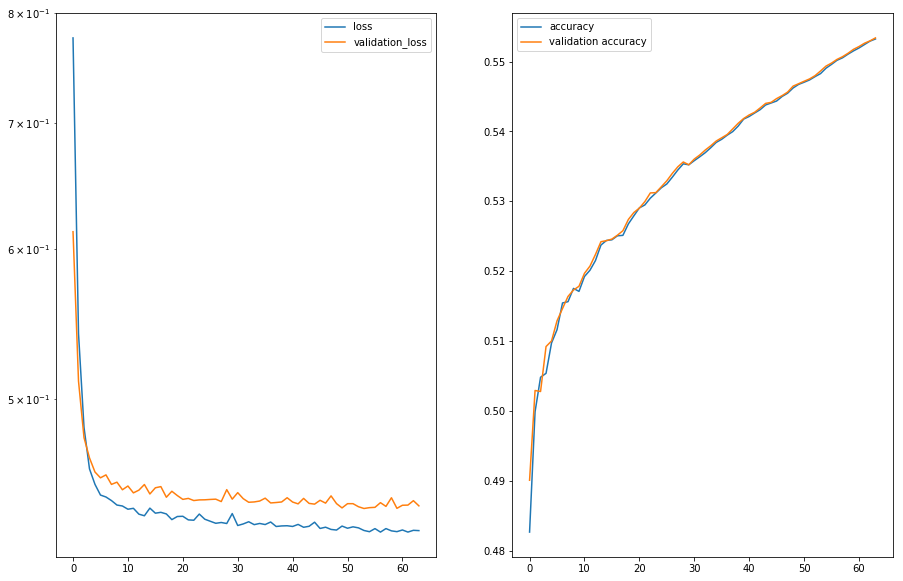

3377/3377 [==============================] - 36s 11ms/step - loss: 0.4259 - auc: 0.5532 - val_loss: 0.4389 - val_auc: 0.5534
Wall time: 41min 4s


In [103]:
%%time
count_epochs = 3000
model = create_dnn_model()
early_stopping_monitor = EarlyStopping(patience=10)
#class_weights = compute_class_weight('balanced', np.unique(y), y)
#history = model.fit([np.array(X), np.array(X2), np.array(X3)], np.array(y), batch_size = 64, epochs = count_epochs, verbose=1, validation_split=0.2, class_weight=class_weights, callbacks=[plot,early_stopping_monitor])
class_weights = compute_class_weight('balanced', np.unique(y), y)
history = model.fit([np.array(X_train_1), np.array(X_train_4), np.array(X_train_5)], np.array(y_train), \
        batch_size = 96, epochs = count_epochs, verbose=1, \
        validation_data=([np.array(X_test_1), np.array(X_test_4), np.array(X_test_5)], np.array(y_test)),\
        class_weight=class_weights, callbacks=[plot,early_stopping_monitor, save_best])
send_notify('Complete fit')

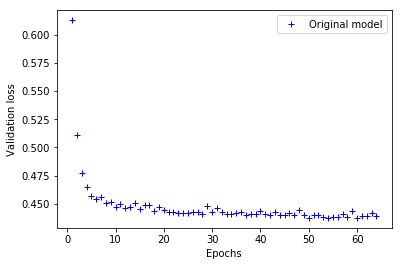

In [111]:
history_gr = history.history['val_loss']
epochs = range(1, len(history_gr) + 1)
import matplotlib.pyplot as plt

plt.plot(epochs, history_gr, 'b+', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [108]:
predict = model.predict([np.array(X_test_1), np.array(X_test_4), np.array(X_test_5)])
score = roc_auc_score(y_test, predict)
print("Total roc auc score = {0:0.4f}".format(score))

Total roc auc score = 0.5892


In [107]:
model.load_weights("best_model.h5")

In [60]:
model_json = model.to_json()
# Записываем модель в файл
json_file = open("sale_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("sale_model.h5")

In [44]:
T = np.loadtxt('X_5221_6_59.test', delimiter=',').reshape(5221, 6, 59)
T2 = np.loadtxt('X2_5221_14_164.test', delimiter=',').reshape(5221, 14, 164)
T3 = np.loadtxt('X3_5221_14_44.test', delimiter=',').reshape(5221, 14, 44)

T4 = np.loadtxt('X2_5221_50_164.test', delimiter=',').reshape(5221, 50, 164)
T5 = np.loadtxt('X3_5221_50_44.test', delimiter=',').reshape(5221, 50, 44)


In [109]:
def save_predict(predict):
    with open('output/2.csv', 'w') as f:
        for item in predict:
            f.write("%s\n" % item[0])

In [110]:
save_predict(model.predict([np.array(T), np.array(T4), np.array(T5)]))